In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from moe import *
import optuna
import torch
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint
from torch.utils.data import DataLoader, TensorDataset

In [2]:
X_train = pd.read_csv('artifacts/clean_data' + '/X_train.csv').astype(np.float32)
X_test = pd.read_csv('artifacts/clean_data' + '/X_test.csv').astype(np.float32)
y_train = np.asarray(np.load('artifacts/clean_data' + '/y_train.npy'), np.float32)
y_test = np.asarray(np.load('artifacts/clean_data' + '/y_test.npy'), np.float32)

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
# from pytorch_lightning.loggers.logger import Logger


# class CustomLogger(Logger):
#     def __init__(self, save_dir: str, name: str = "simple_logger", version: str = "0"):
#         super().__init__()
#         self._save_dir = save_dir
#         self._name = name
#         self._version = version
#         self.metrics = {}
        
#     @property
#     def save_dir(self):
#         return self._save_dir
    
#     @save_dir.setter
#     def save_dir(self, val):
#         self._save_dir = val
    
#     @property
#     def name(self):
#         return self._name    
    
#     def log_hyperparams(self, params):
#         pass  
    
#     @property
#     def experiment(self):
#         return None  # Not using any external experiment management

#     @property
#     def log_dir(self):
#         return self.save_dir

#     def log_metrics(self, metrics, step):
#         for metric_name, metric_value in metrics.items():
#             if isinstance(metric_value, torch.Tensor):
#                 metric_value = metric_value.item()  # Convert to Python scalar if tensor
#             if metric_name not in self.metrics.keys():
#                 self.metrics[metric_name] = []
#             self.metrics[metric_name].append(metric_value)

#     def finalize(self, status):
#         pass
    
#     @property
#     def version(self):
#         return self._version
    
#     @version.setter
#     def version(self, a):
#         pass

In [8]:
def loss_per_epoch(X_train, X_test, y_train, y_test):
    model = MixtureOfExperts(
        input_dim=X_train.shape[1],
        output_dim=1,
        num_experts=len(np.unique(y_train)),
        expert_hidden_units=[32, 64, 32],
        gate_hidden_units=[64, 32],
        num_active_experts=3,
        dropout_rate=0.2
    )
    print(model)
    # train_loader = DataLoader(TensorDataset(torch.tensor(X_train.values, device='cuda'), torch.tensor(y_train, device='cuda')), batch_size=4096, shuffle=True)
    # val_loader = DataLoader(TensorDataset(torch.tensor(X_test.values, device='cuda'), torch.tensor(y_test, device='cuda')), batch_size=4096)

    # lrs = (10**(- np.arange(1,16) / 2)).tolist()
    # losses = []
    # for lr in lrs:
    #     model_ = MixtureOfExperts(
    #         input_dim=input_dim,
    #         output_dim=output_dim,
    #         num_experts=len(np.unique(y_train)),
    #         expert_hidden_units=[32, 64, 32],
    #         gate_hidden_units=[64, 32],
    #         num_active_experts=3,
    #         dropout_rate=0.2,
    #         learning_rate=lr
    #     )
    #     model_.load_state_dict(model.state_dict())
    #     logger = CustomLogger('aaa')
    #     trainer = pl.Trainer(max_epochs=10, logger=logger)
    #     trainer.fit(model_, train_loader, val_loader)
    #     losses.append(logger.metrics['train_loss_epoch'])
        
    # return lrs, losses

In [9]:
lrs, losses = loss_per_epoch(X_train, X_test, y_train, y_test)

MixtureOfExperts(
  (experts): ModuleList(
    (0-5): 6 x ExpertModel(
      (model): Sequential(
        (0): Linear(in_features=15, out_features=32, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.2, inplace=False)
        (3): Linear(in_features=32, out_features=64, bias=True)
        (4): ReLU()
        (5): Dropout(p=0.2, inplace=False)
        (6): Linear(in_features=64, out_features=32, bias=True)
        (7): ReLU()
        (8): Dropout(p=0.2, inplace=False)
        (9): Linear(in_features=32, out_features=1, bias=True)
      )
    )
  )
  (gate): GateModel(
    (model): Sequential(
      (0): Linear(in_features=15, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=64, out_features=32, bias=True)
      (4): ReLU()
      (5): Dropout(p=0.2, inplace=False)
      (6): Linear(in_features=32, out_features=6, bias=True)
    )
  )
  (criterion): CrossEntropyLoss()
)


TypeError: cannot unpack non-iterable NoneType object

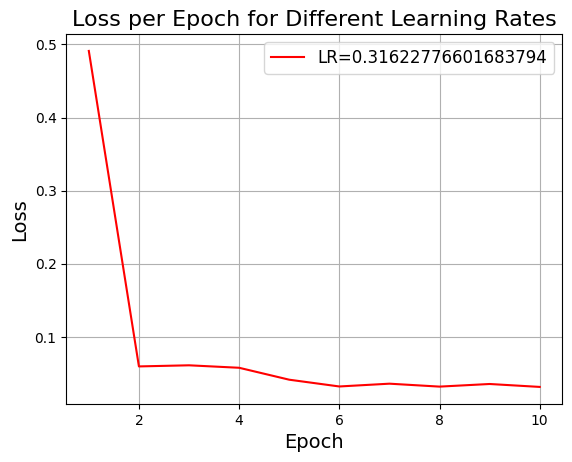

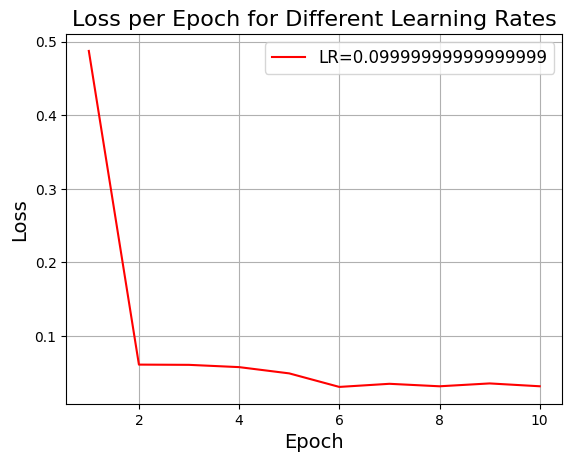

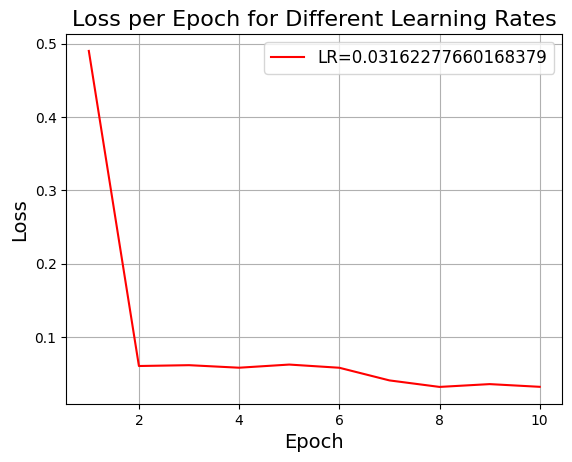

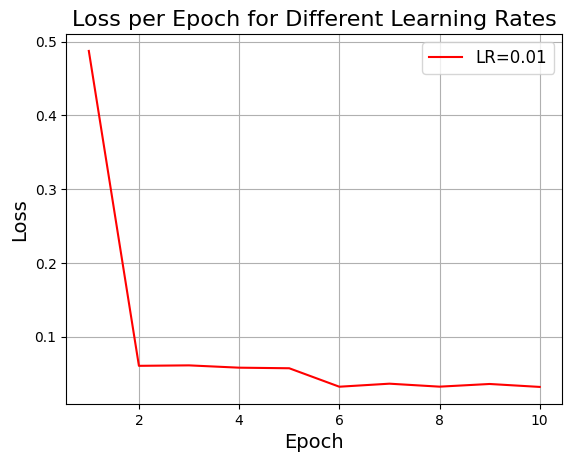

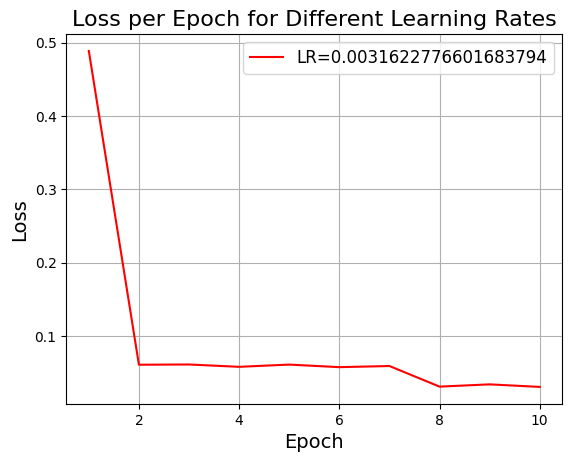

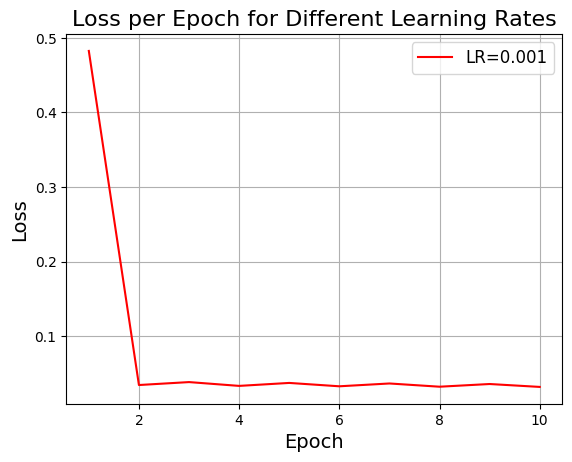

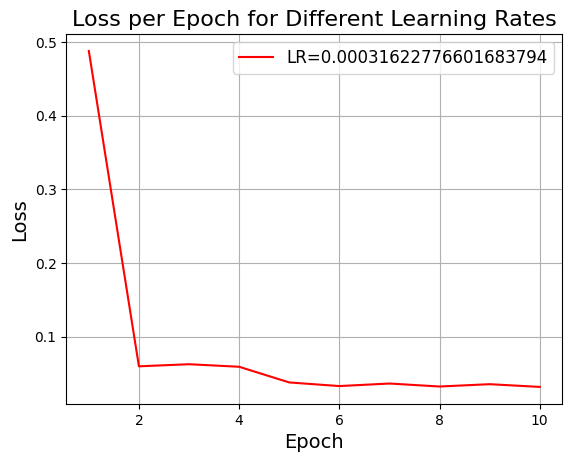

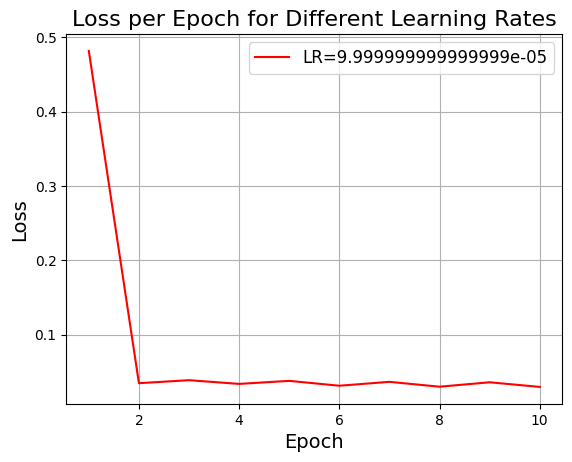

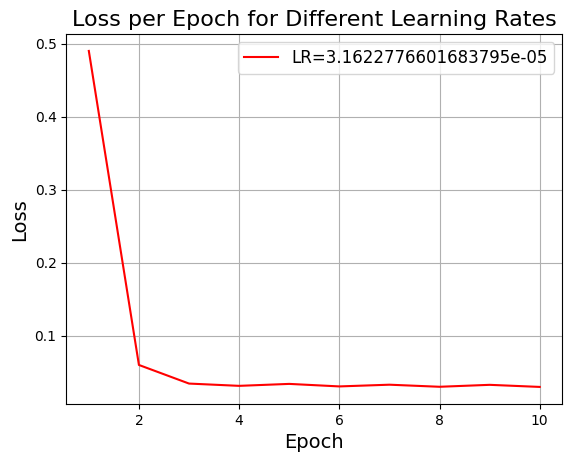

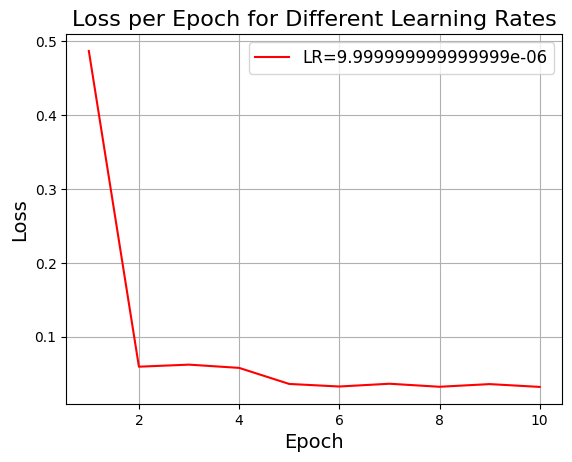

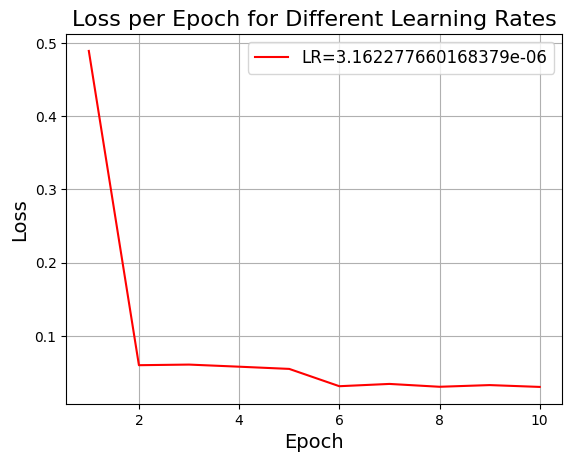

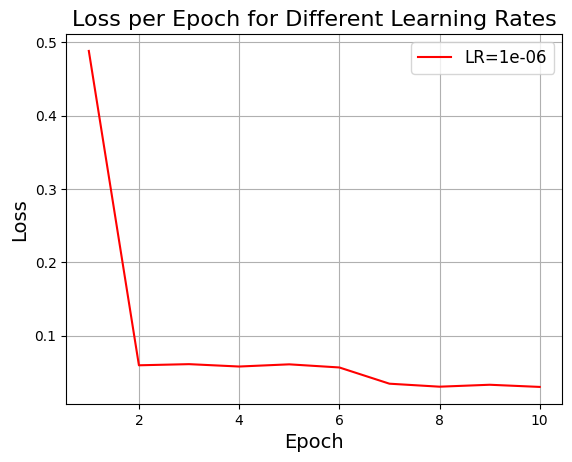

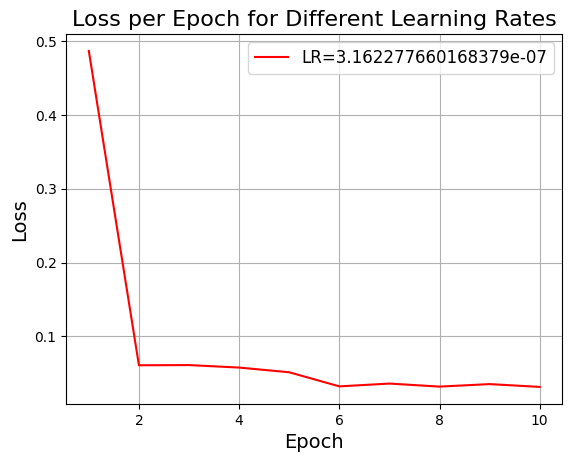

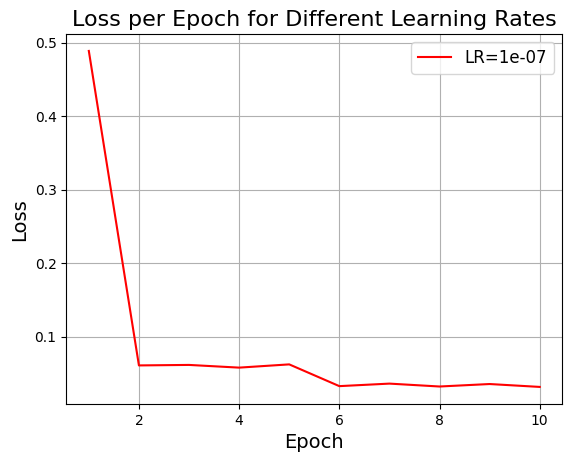

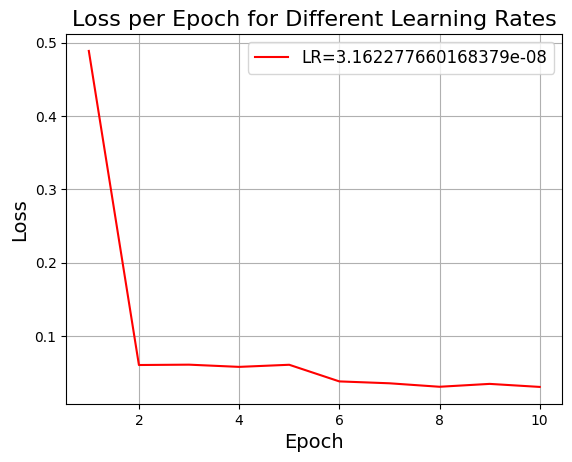

In [107]:
for lr, losses_ in zip(lrs, losses):
    plt.plot(range(1, 1 + len(losses_)), losses_, color='r', label=f'LR={lr}')
    
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.title('Loss per Epoch for Different Learning Rates', fontsize=16)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)

    plt.show()